In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("Final_Train.xlsx")

df.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350


In [92]:
train=pd.read_excel('Final_Train.xlsx')

In [4]:
df.isnull().sum()/len(df)*100

Qualification          0.000000
Experience             0.000000
Rating                55.393390
Place                  0.419393
Profile                0.000000
Miscellaneous_Info    43.952357
Fees                   0.000000
dtype: float64

In [4]:
#now lets start preparing data..

In [5]:
df['Experience'] = df['Experience'].str.split(" ").str[0]

In [6]:
df.head(1)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100


In [7]:
df['Experience']= df['Experience'].astype(int)

In [8]:
df.dtypes

Qualification         object
Experience             int32
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [9]:
df['Place'].fillna("Unknown,Unknown", inplace= True)

In [10]:
df['City']=df['Place'].str.split(",").str[-1]

In [11]:
df['Place']=df['Place'].str.split(',').str[0]

In [12]:
df.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,100%,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98%,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore


In [13]:
# now lets try to simplify the data in Rating column

In [14]:
# Seperate Ratings into bins

df['Rating'].fillna("-99%", inplace=True)
df['Rating']=df['Rating'].str[0:-1].astype(int)

bins = [-99, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] #considering a range..

labels = [i for i in range(11)]

df['Rating'] = pd.cut(df['Rating'], bins=bins, labels=labels, include_lowest=True)
#using cut method to change example: 0=10% into 1, or 10-20%=2 and so on

In [15]:
 df.head(2)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"BHMS, MD - Homeopathy",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore


In [16]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [17]:
df["Qualification"].values

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ..., 'MBBS',
       'MBBS, MD - General Medicine', 'BDS, MDS - Orthodontics'],
      dtype=object)

In [18]:
## Extract relevant qualification

df['Qualification']=df['Qualification'].str.split(",")
Qualification = {}  # dictionary : dictionary has key and values, hence as expample BHMS is a key and 749 is its values.

for x in df['Qualification'].values:  # 1 by 1 every value will be saving into x
    for each in x:     # BAMS going into each(variable) then, MD - Homeopathy' will go into each and so on..
        each = each.strip()   # strip will remove the spaces 
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1


     

In [19]:
df.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City
0,"[BHMS, MD - Homeopathy]",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam
1,"[BAMS, MD - Ayurveda Medicine]",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore
2,"[MBBS, MS - Otorhinolaryngology]",9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore
3,"[BSc - Zoology, BAMS]",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore
4,[BAMS],20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai


In [20]:
Qualification 

{'BHMS': 749,
 'MD - Homeopathy': 181,
 'BAMS': 764,
 'MD - Ayurveda Medicine': 139,
 'MBBS': 2808,
 'MS - Otorhinolaryngology': 103,
 'BSc - Zoology': 3,
 'BDS': 1363,
 'MD - General Medicine': 285,
 'BSc': 3,
 'MS': 2,
 'DNB - ENT': 111,
 'MDS': 82,
 'MDS - Oral & Maxillofacial Surgery': 104,
 'Diploma in Otorhinolaryngology (DLO)': 250,
 'MF- Homeopathy': 5,
 'MS - ENT': 411,
 'DNB': 58,
 'Fellowship of College of General Practice (FCGP)': 13,
 'DDVL': 161,
 'IBCLC (USA)': 1,
 'Post Graduate Diploma in Diabetology (PGDD)': 53,
 'Diploma in Dermatology': 67,
 'Fellowship in Aesthetic Medicine': 23,
 'DM - Neurology': 6,
 'MD - Pediatrics': 13,
 'Fellowship in Cleft Lip and Craniofacial Surgery': 1,
 'Diploma in Cosmetology': 3,
 'AFIH': 4,
 'MDS - Prosthodontist And Crown Bridge': 45,
 'M. D. Hom. (Practice of Medicine)': 2,
 'Diploma in Emergency Medicine': 8,
 'Diploma in Counselling Skills': 2,
 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 47,
 'MD - Dermatology': 606,
 '

In [21]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
# this code will take top 10 most used term which starts with 1th position in Qualification items..

In [22]:
Qualification.items()

dict_items([('BHMS', 749), ('MD - Homeopathy', 181), ('BAMS', 764), ('MD - Ayurveda Medicine', 139), ('MBBS', 2808), ('MS - Otorhinolaryngology', 103), ('BSc - Zoology', 3), ('BDS', 1363), ('MD - General Medicine', 285), ('BSc', 3), ('MS', 2), ('DNB - ENT', 111), ('MDS', 82), ('MDS - Oral & Maxillofacial Surgery', 104), ('Diploma in Otorhinolaryngology (DLO)', 250), ('MF- Homeopathy', 5), ('MS - ENT', 411), ('DNB', 58), ('Fellowship of College of General Practice (FCGP)', 13), ('DDVL', 161), ('IBCLC (USA)', 1), ('Post Graduate Diploma in Diabetology (PGDD)', 53), ('Diploma in Dermatology', 67), ('Fellowship in Aesthetic Medicine', 23), ('DM - Neurology', 6), ('MD - Pediatrics', 13), ('Fellowship in Cleft Lip and Craniofacial Surgery', 1), ('Diploma in Cosmetology', 3), ('AFIH', 4), ('MDS - Prosthodontist And Crown Bridge', 45), ('M. D. Hom. (Practice of Medicine)', 2), ('Diploma in Emergency Medicine', 8), ('Diploma in Counselling Skills', 2), ('DHMS (Diploma in Homeopathic Medicine an

In [23]:
#most_qua= sorted(Qualification.items(), key= lambda x:x[1], reverse=True)[:10]
#used lambda to put condition in qualification items and reverse is used to start from biggest number value item.

In [24]:
print(most_qua)

[('MBBS', 2808), ('BDS', 1363), ('BAMS', 764), ('BHMS', 749), ('MD - Dermatology', 606), ('MS - ENT', 411), ('Venereology & Leprosy', 297), ('MD - General Medicine', 285), ('Diploma in Otorhinolaryngology (DLO)', 250), ('MD - Homeopathy', 181)]


In [25]:
final_qua =[]
for tup in most_qua:    # tup is a variable just defined here.. it will save the value: MBBS , as final_qua is appending with tup[0]
    final_qua.append(tup[0])

In [26]:
print(final_qua)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [27]:
for title in final_qua:
    df[title]=0   # creating column with the titles we have in final_qua

In [28]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees', 'City', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy'],
      dtype='object')

In [29]:
for x,y in zip(df["Qualification"].values,np.array([idx for idx in range(len(df))])):   #len(df) will be length of number of rows, x, y values in array
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [30]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,"[BHMS, MD - Homeopathy]",24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,"[BAMS, MD - Ayurveda Medicine]",12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,"[MBBS, MS - Otorhinolaryngology]",9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,"[BSc - Zoology, BAMS]",12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,[BAMS],20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0


In [31]:
df.drop(['Qualification'], inplace=True, axis=1)

In [32]:
df.head()

,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Kakkanad,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Whitefield,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,ENT Specialist,NaN,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Keelkattalai,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,0,0,1,0,0,0,0,0,0,0


In [33]:
df.drop(['Miscellaneous_Info'], inplace=True, axis=1)

In [34]:
df.head()

,Experience,Rating,Place,Profile,Fees,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,10,Kakkanad,Homeopath,100,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,10,Whitefield,Ayurveda,350,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,0,Mathikere - BEL,ENT Specialist,300,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,0,Bannerghatta Road,Ayurveda,250,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,10,Keelkattalai,Ayurveda,250,Chennai,0,0,1,0,0,0,0,0,0,0


In [37]:
df['City'].isnull().sum()

0

In [38]:
df['City'].dtypes

dtype('O')

In [42]:
df['City'].values

array([' Ernakulam', ' Bangalore', ' Bangalore', ..., ' Delhi', ' Mumbai',
       ' Delhi'], dtype=object)

In [43]:
df['City'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Unknown', 'e'],
      dtype=object)

In [47]:
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

In [49]:
df['Place'].value_counts()

HSR Layout              75
Andheri West            70
Dwarka                  68
Banjara Hills           64
Mulund West             54
Borivali West           52
Kandivali West          50
Indiranagar             48
Malleswaram             47
Malad West              47
Whitefield              47
Pitampura               45
Andheri East            43
Vileparle West          43
Powai                   42
Jubilee Hills           40
Marathahalli            39
Bannerghatta Road       39
Bandra West             38
Kondapur                38
Ghatkopar East          38
Rohini                  37
Janak Puri              37
Secunderabad            37
Adyar                   37
Paschim Vihar           36
Shalimar Bagh           36
Koramangala             35
KPHB                    35
R.S. Puram              34
                        ..
Madanpura                1
Mettupalayam             1
Vazhakulam               1
Coimbatore Aerodrome     1
Darya Ganj               1
Chintalmet               1
S

In [50]:
df[df['City']=='e']['City']

3980    e
Name: City, dtype: object

In [51]:
df[df['Place']=='e']['Place']

3980    e
Name: Place, dtype: object

In [52]:
# i am replacing this data with unknown...
df["City"][3980] = "Unknown"
df["Place"][3980] = "Unknown"

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
df['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  26
Name: City, dtype: int64

In [57]:
# using get dummies

df = pd.get_dummies(df, columns=['City', 'Profile'], prefix=['City', 'Profile'])

In [58]:
df.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [65]:
from sklearn.preprocessing import LabelEncoder

In [66]:
le = LabelEncoder()

In [67]:
df['Place']= le.fit_transform(df['Place'])

In [71]:
df['Place'].dtypes

dtype('int32')

In [70]:
df.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,296,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,856,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,452,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,68,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,335,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
df.columns

Index(['Experience', 'Rating', 'Place', 'Fees', 'MBBS', 'BDS', 'BAMS', 'BHMS',
       'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy',
       'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)',
       'MD - Homeopathy', 'City_ Bangalore', 'City_ Chennai',
       'City_ Coimbatore', 'City_ Delhi', 'City_ Ernakulam', 'City_ Hyderabad',
       'City_ Mumbai', 'City_ Thiruvananthapuram', 'City_Unknown',
       'Profile_Ayurveda', 'Profile_Dentist', 'Profile_Dermatologists',
       'Profile_ENT Specialist', 'Profile_General Medicine',
       'Profile_Homeopath'],
      dtype='object')

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

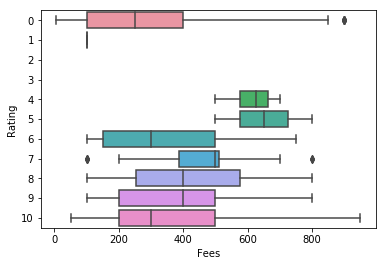

In [76]:
sns.boxplot(df['Fees'], df['Rating'])
plt.show()

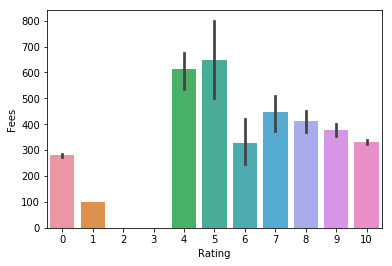

In [79]:
sns.barplot(df['Rating'], df['Fees'])
plt.show()

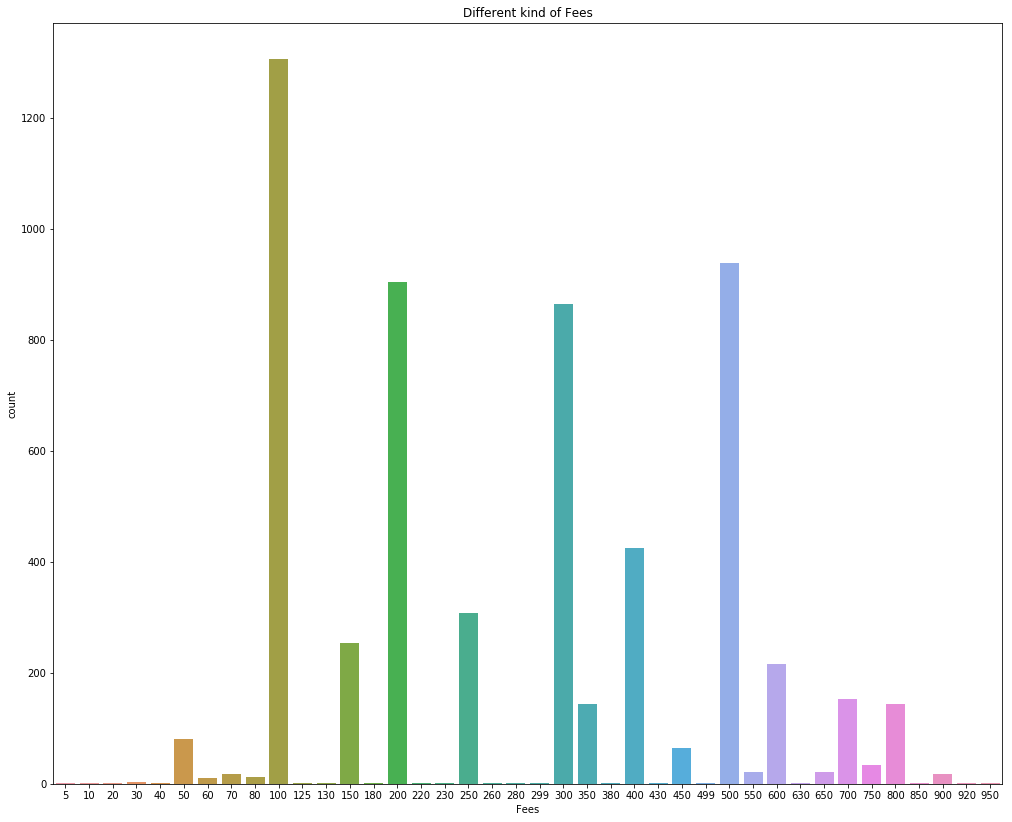

In [85]:
plt.figure(figsize=(17,14))
sns.countplot(x='Fees', data=df)
plt.title('Different kind of Fees')
plt.show()

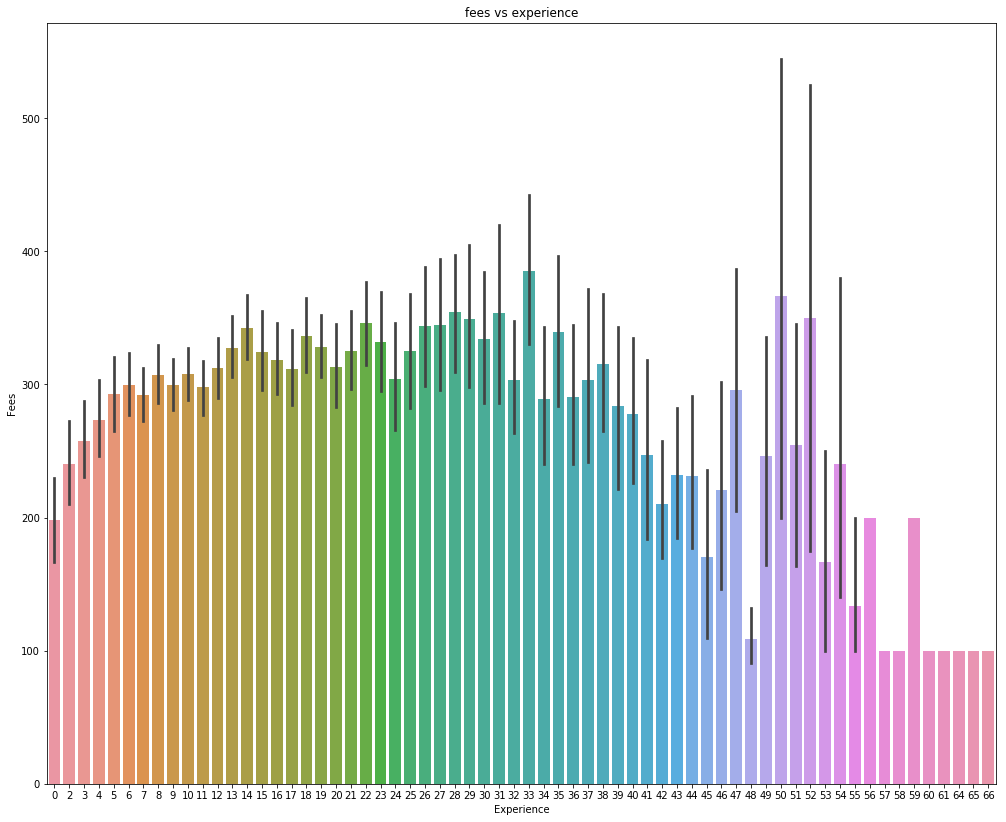

In [83]:
plt.figure(figsize=(17,14))
sns.barplot(df['Experience'], df['Fees'])
plt.title('fees vs experience')
plt.show()

In [103]:
#x = df.drop('Fees', inplace=True, axis=1)

x= df.copy()

In [96]:
y= train.Fees

In [97]:
y.shape

(5961,)

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.25, random_state=47)


In [106]:
rfr = RandomForestRegressor()

In [108]:
rfr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [110]:
rfr.score(x_train,y_train)

0.8350582493514233

In [112]:
pred = rfr.predict(x_test)

In [115]:
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [116]:
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.11704754460431188
32849.8782374177


In [101]:
y.head()

0    100
1    350
2    300
3    250
4    250
Name: Fees, dtype: int64

In [104]:
x.head()

,Experience,Rating,Place,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,296,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,856,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,452,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,68,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,335,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [121]:
# GridSearch CV
from sklearn.model_selection import cross_val_score

cvscore= cross_val_score(rfr, x, y, cv=10)



In [122]:
print(cvscore)

[0.04003357 0.15482918 0.11595655 0.07199922 0.18149514 0.14188789
 0.10344834 0.02595845 0.08730837 0.06214784]


In [123]:
print(cvscore.mean())
print(cvscore.std())

0.09850645264578148
0.04806507921165552


In [125]:
import pickle   # saving model..
saved_model = pickle.dumps(rfr)

In [128]:
load_model=pickle.loads(saved_model)


In [129]:
load_model.predict(x_test)

array([335., 147., 420., ..., 280., 315.,  95.])